# Graphs

In [1]:
#imports
import networkx as nx

import pandas as pd
from operator import itemgetter
import matplotlib.pyplot as plt
import collections
from community import community_louvain
from networkx.algorithms.community.centrality import girvan_newman
import itertools
%matplotlib inline

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Global variables 

DEGREE = 1

DEGREE_FILE = '../generated/map/degree_' + str(DEGREE) +'/'

def get_graph_elem_file(elem_type, leak):
    return DEGREE_FILE + leak + '_' + elem_type + '.csv'



In [25]:
def remove_loners(full_df):
    node_counts = full_df['START_ID'].append(full_df['END_ID']).value_counts()

    ids_to_remove = []

    for index, row in full_df.iterrows():
        start_id = row['START_ID']
        end_id = row['END_ID']

        if (row['match_x'] == False and node_counts[start_id] < 2) or (row['match_y'] == False and node_counts[end_id] < 2):
            ids_to_remove.append(index)
    
    return full_df.drop(full_df.index[ids_to_remove]).reset_index(drop=True)

def graph_leak_matches(leak, dense=False):
    
    bahamas = (leak == 'bahamas')

    node_id = '0'
    name_index = '1'

    if bahamas:
        node_id = '4' 
        name_index = '7'

    plt.rcParams["figure.figsize"] = (23,23)

    nodes = pd.read_csv(get_graph_elem_file('nodes', leak), index_col=0)\
                                                            .reset_index(drop=True)[[node_id, name_index, 'Match']]

    nodes.rename(columns={node_id:'node_id', name_index:'name', 'Match':'match'}, inplace=True)
    edges = pd.read_csv(get_graph_elem_file('edges', leak), index_col=0).reset_index(drop=True)[['START_ID', 'END_ID']]

    full_df = pd.merge(nodes, edges, left_on='node_id', right_on='START_ID')
    full_df = pd.merge(full_df, nodes, left_on='END_ID', right_on='node_id').drop(['node_id_x', 'node_id_y'], axis=1)
    
    if dense:
        print('Size before removing loners: ' + str(len(full_df)))
        full_df = remove_loners(full_df)
        print('Size after removing loners: ' + str(len(full_df)))
    
    graph = nx.from_pandas_edgelist(full_df, 'name_x', 'name_y', edge_attr=None, create_using= nx.Graph())
    
    #for coloring the nodes
    match_class_1 = full_df[['name_x', 'match_x']].rename(columns={'name_x':'name', 'match_x':'match'})
    match_class_2 = full_df[['name_y', 'match_y']].rename(columns={'name_y':'name', 'match_y':'match'})
    
    match_class = match_class_1.append(match_class_2).set_index('name')
    match_class = match_class[~match_class.index.duplicated(keep='first')]
    
    match_class = match_class.reindex(graph.nodes())
    match_class['match'] = pd.Categorical(match_class['match'])
    
    print('Matches for ' + leak + ' papers: ')
    print(nx.info(graph))
    
    nx.draw(graph, nx.spring_layout(graph, scale=60, k=0.25), with_labels=True, alpha=0.7, node_size=1000,
        node_color=match_class['match'].cat.codes, cmap=plt.cm.autumn)
    

    

Matches for panama papers: 
Name: 
Type: Graph
Number of nodes: 100
Number of edges: 67
Average degree:   1.3400


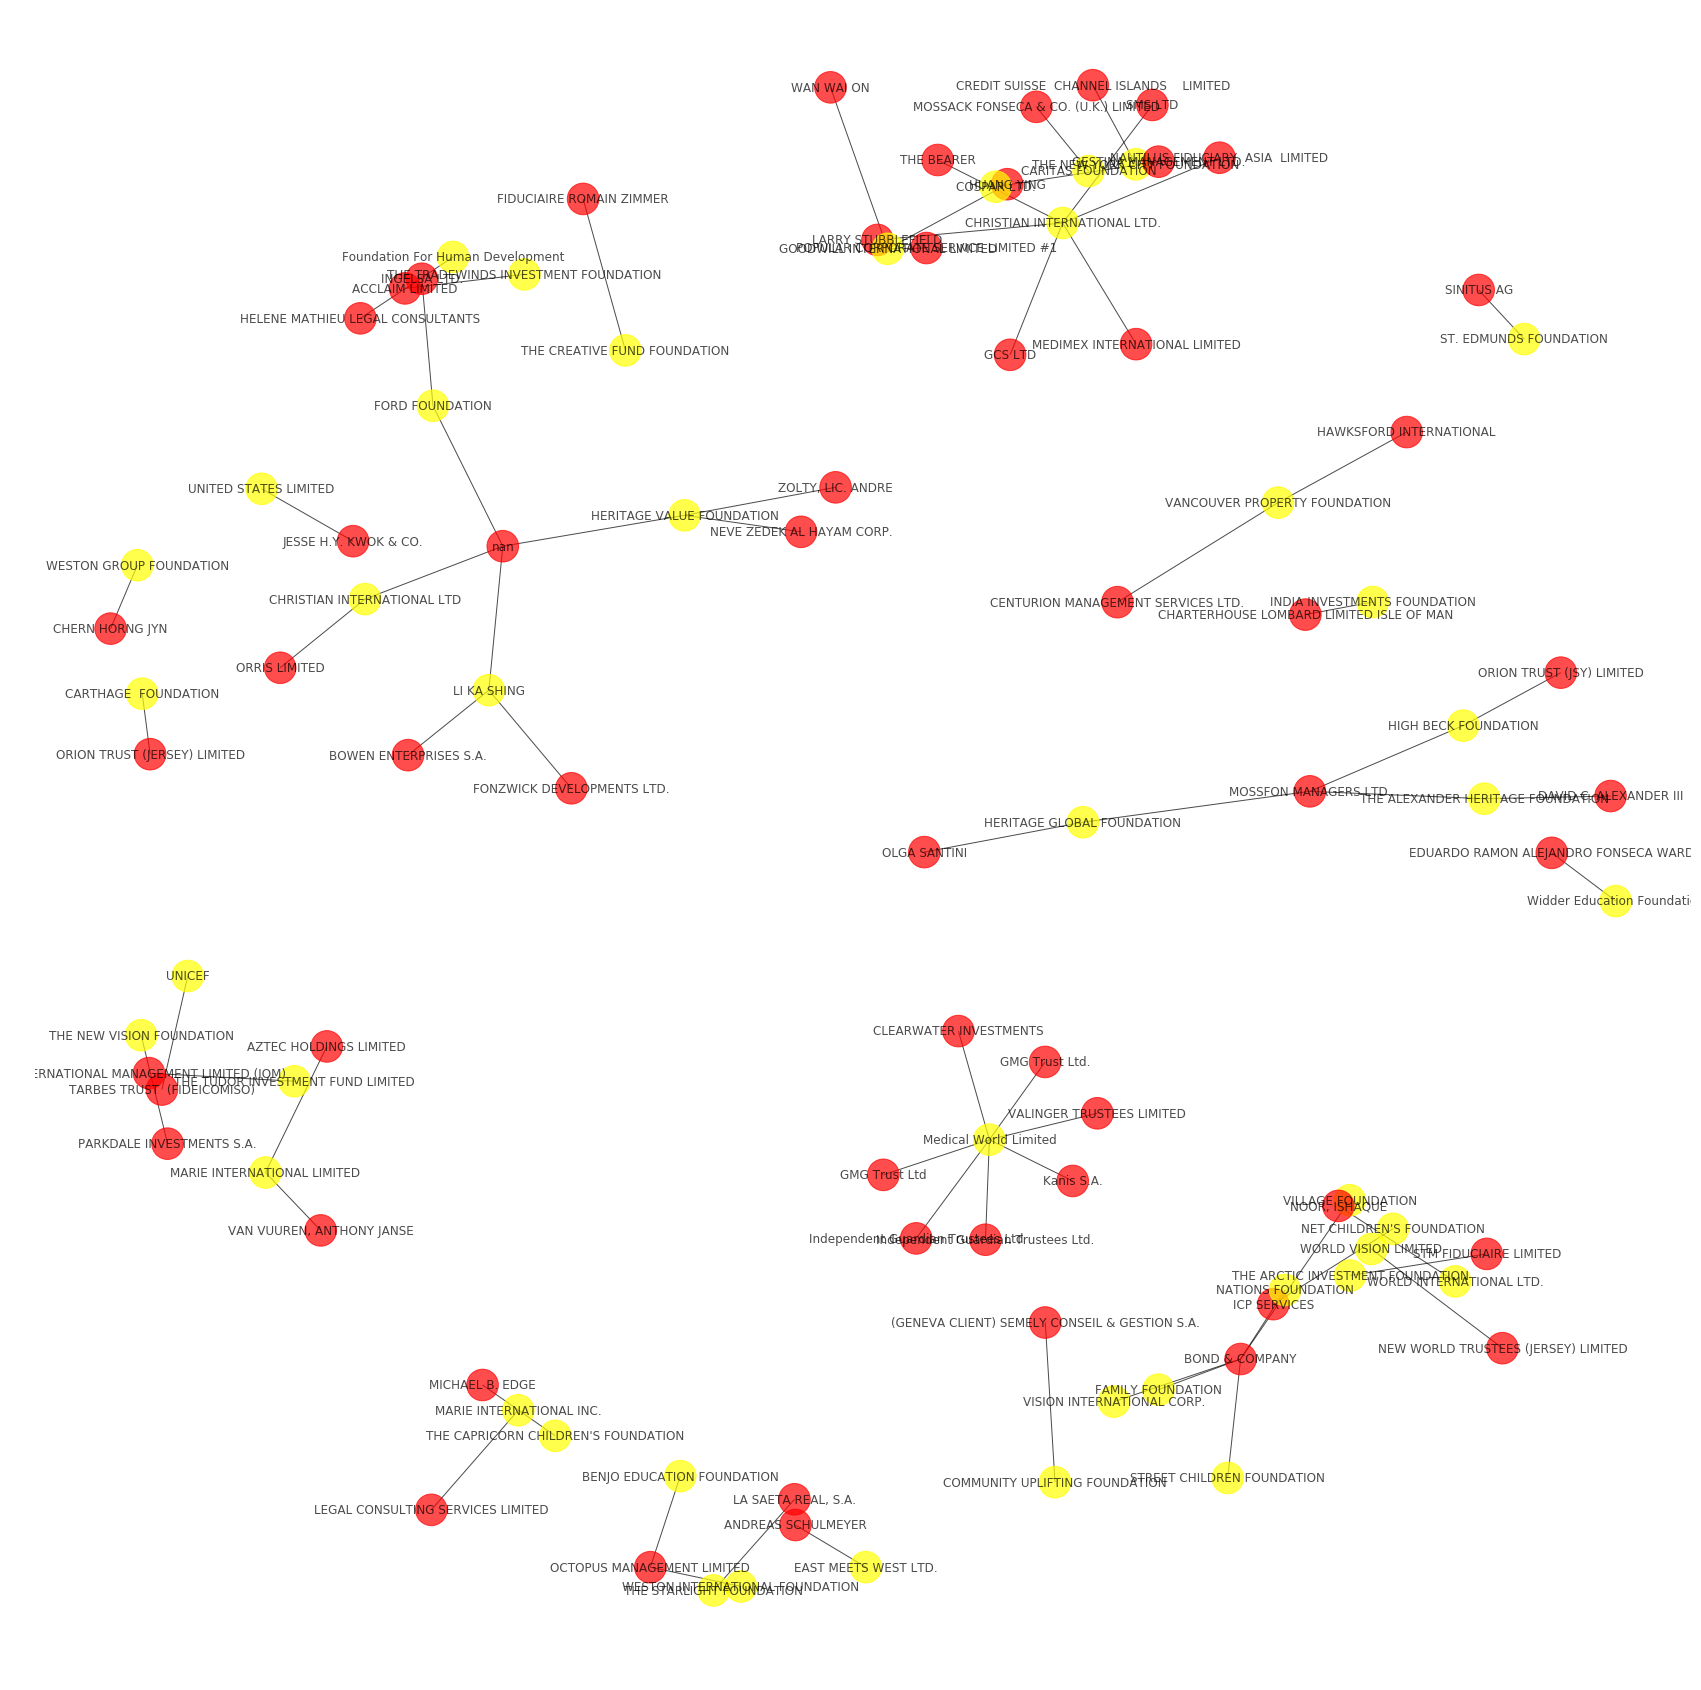

In [27]:
graph_leak_matches('panama')

Matches for paradise papers: 
Name: 
Type: Graph
Number of nodes: 456
Number of edges: 370
Average degree:   1.6228


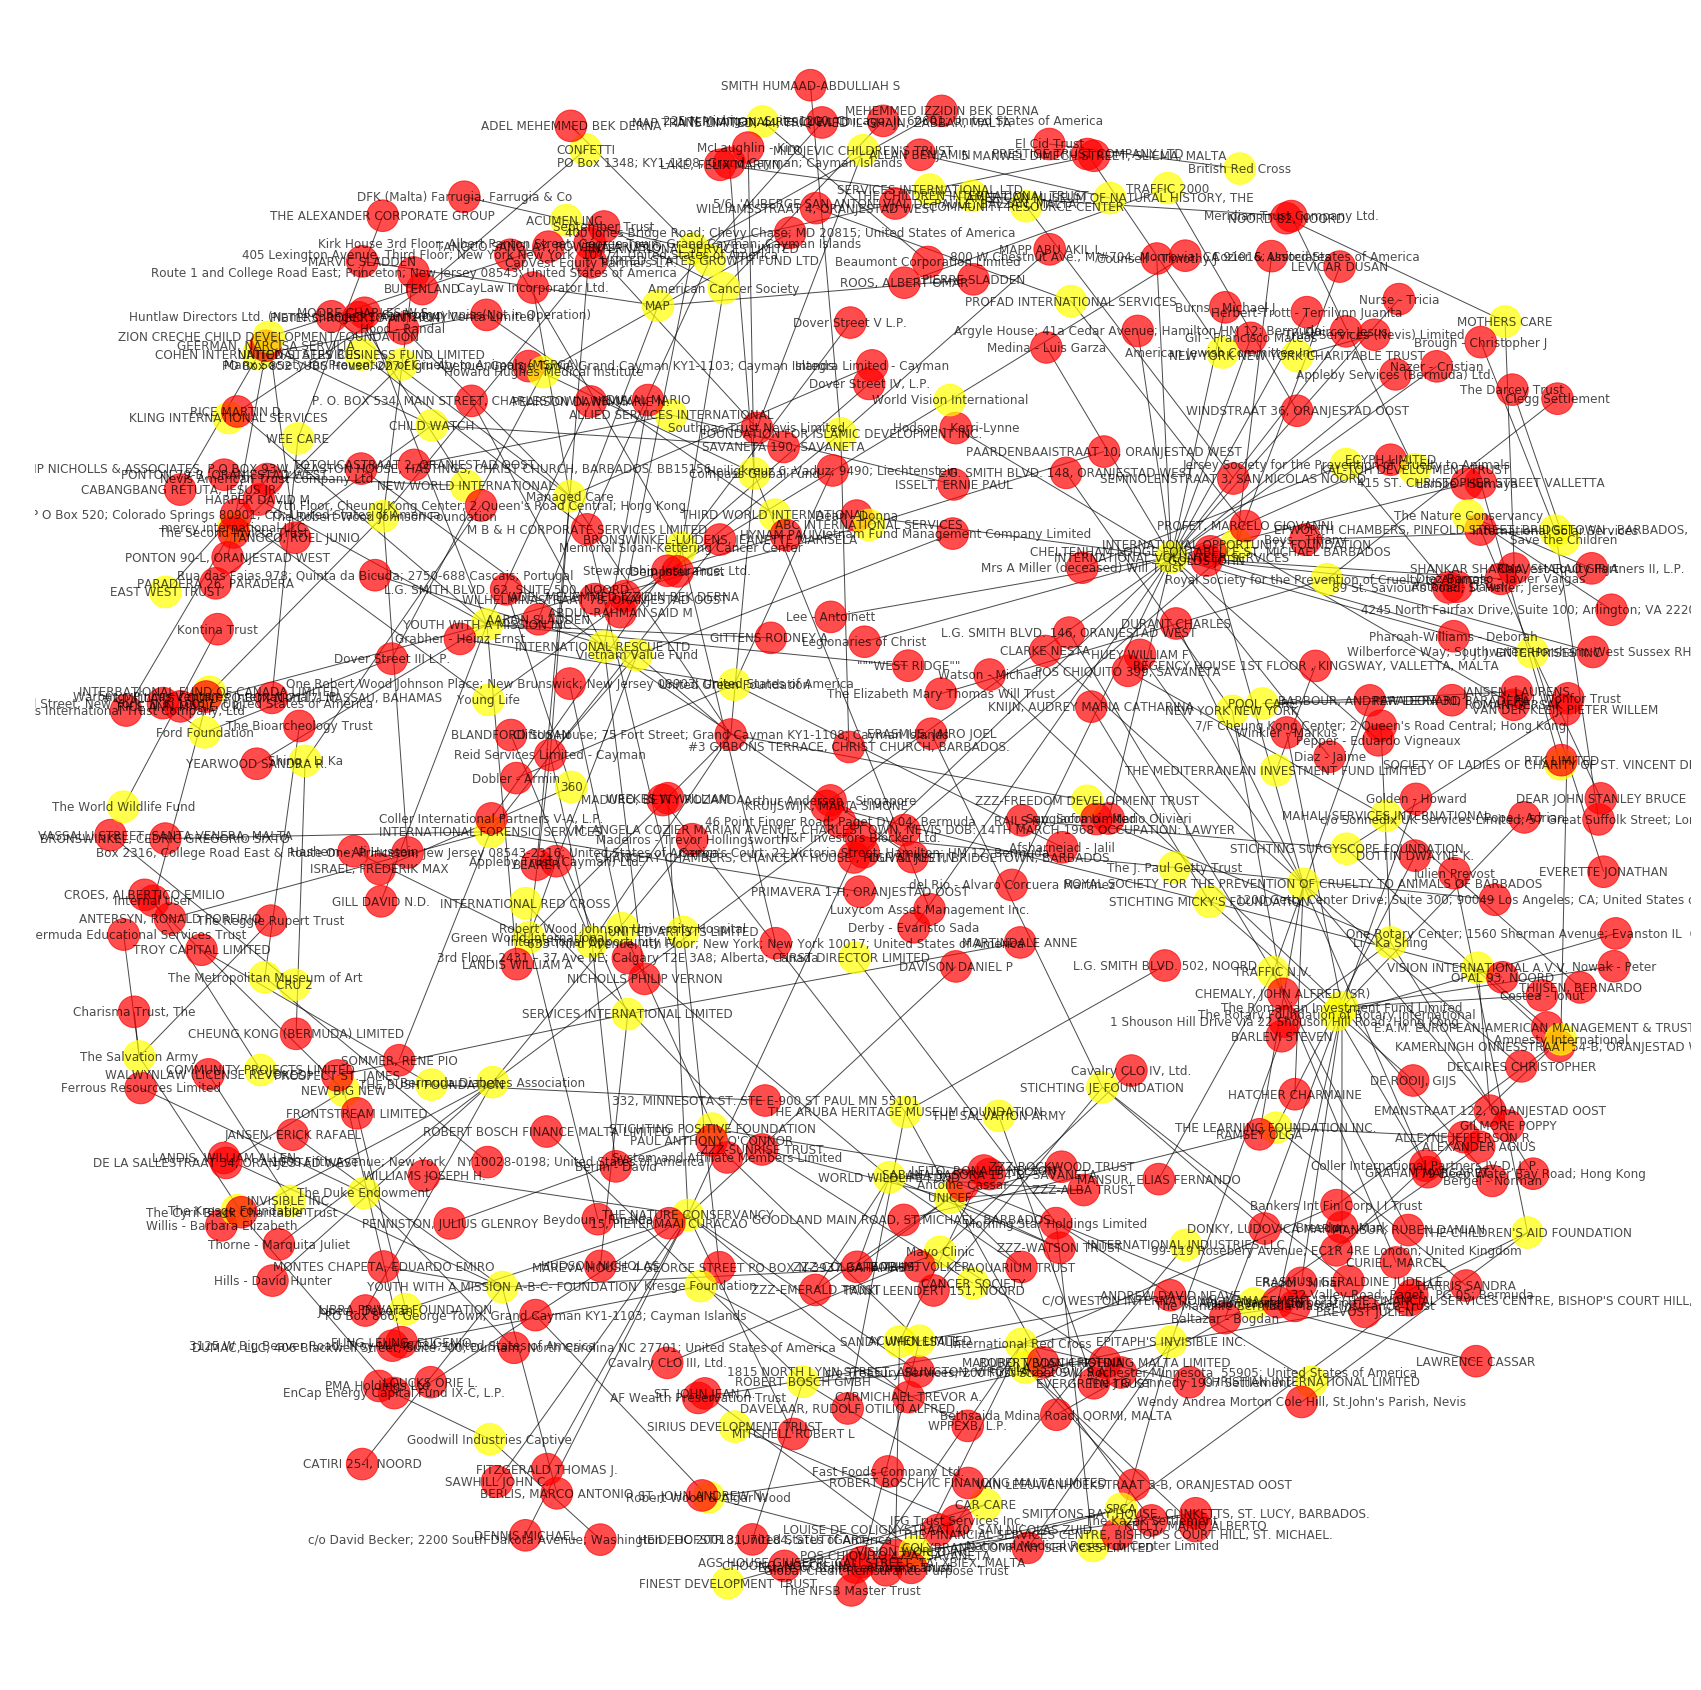

In [16]:
paradise_graph, paradise_colors = graph_leak_matches('paradise')

Matches for offshore papers: 
Name: 
Type: Graph
Number of nodes: 63
Number of edges: 56
Average degree:   1.7778


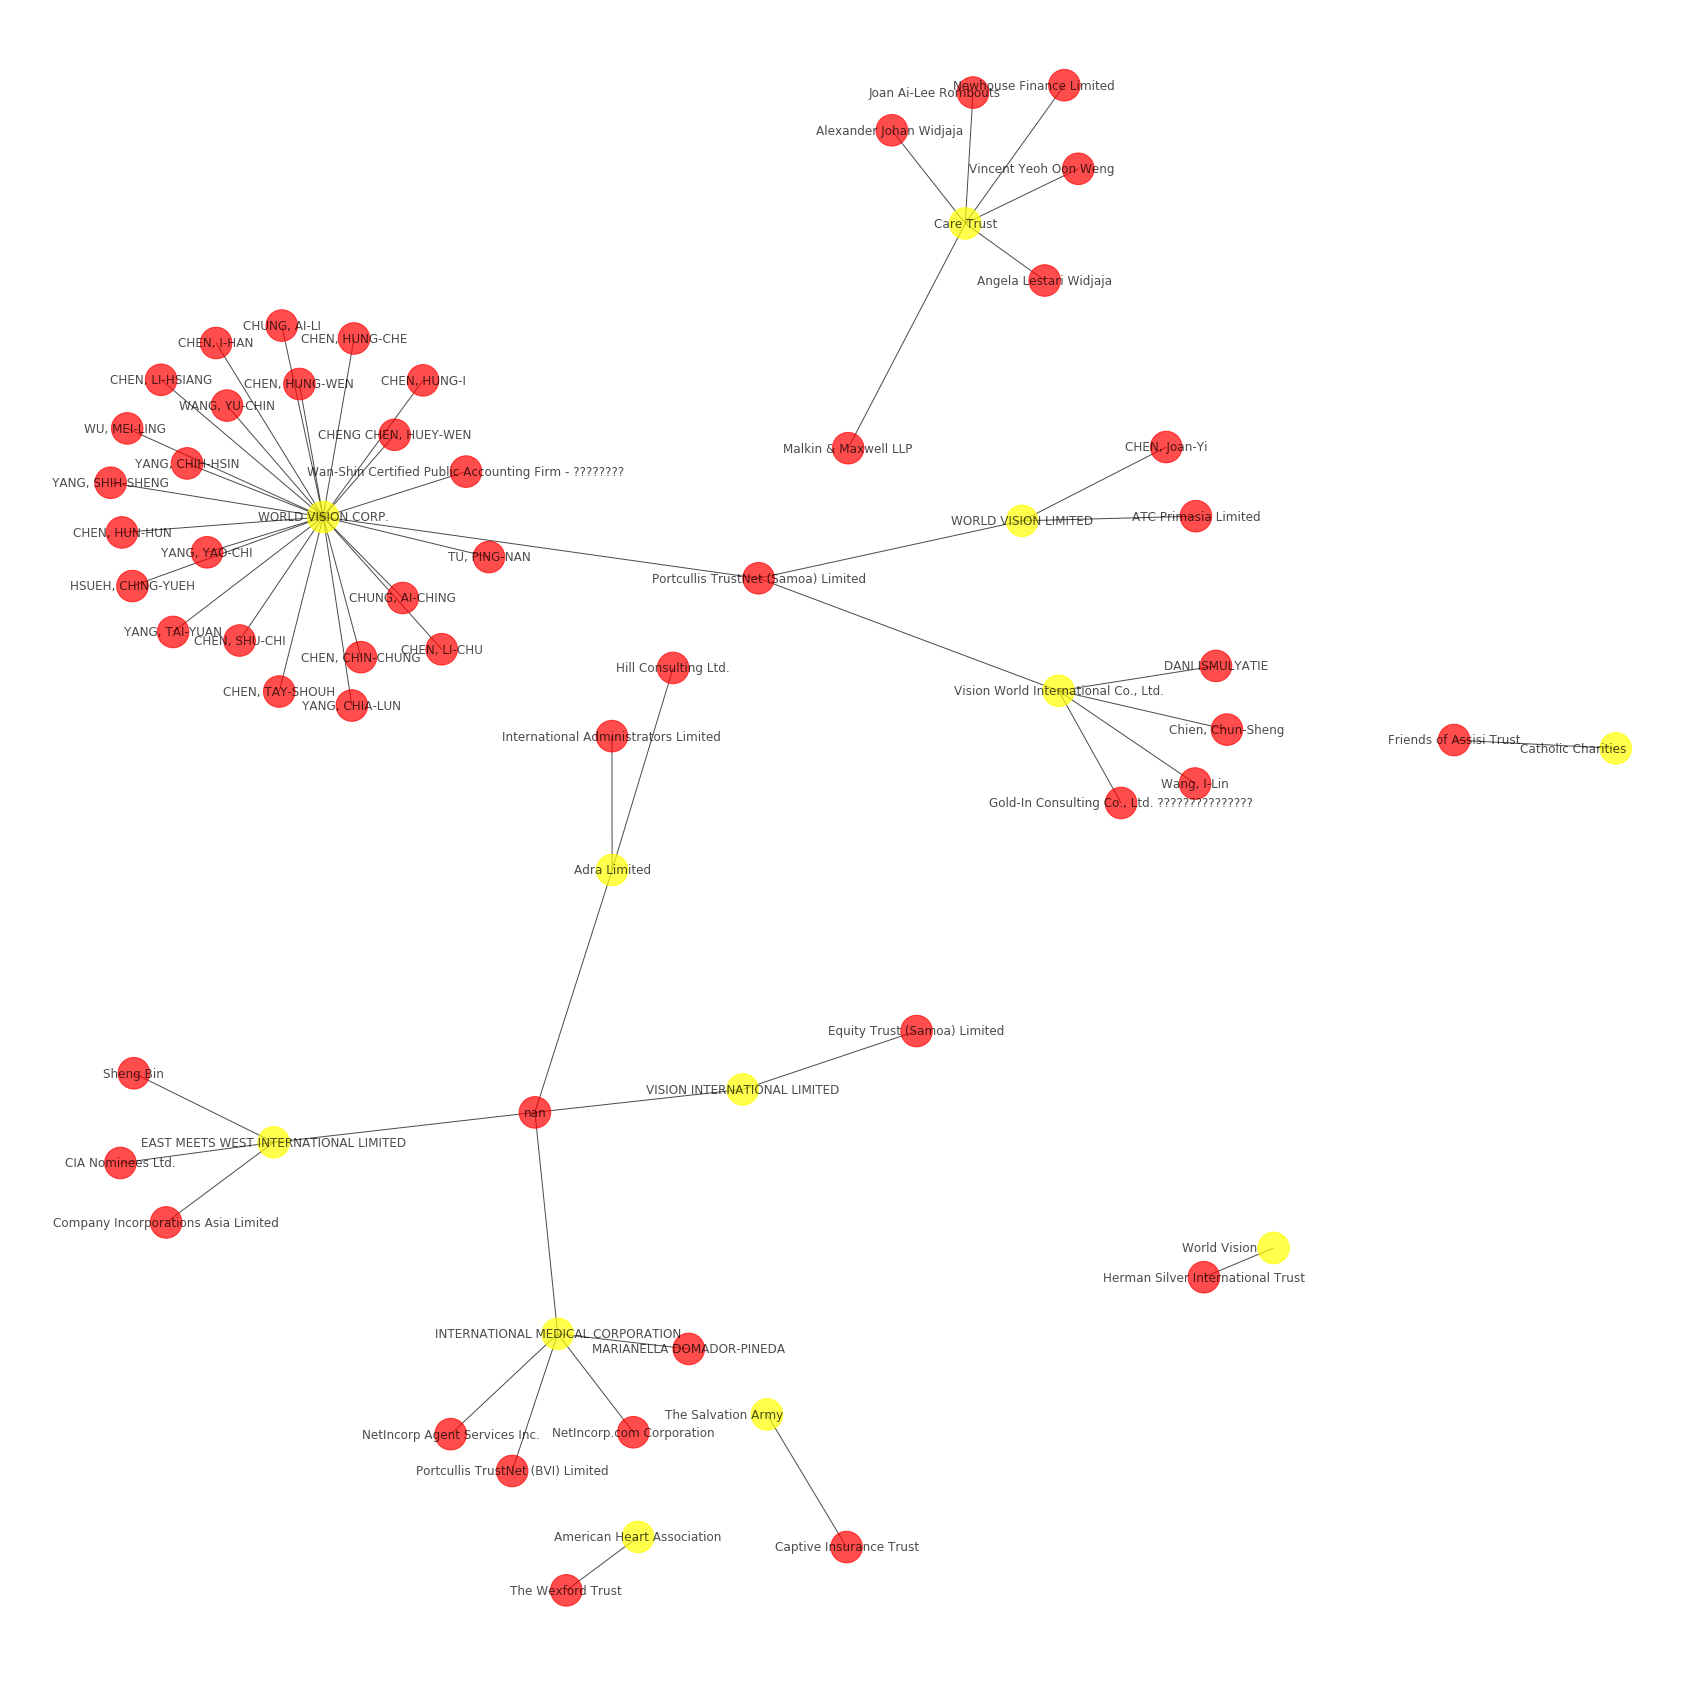

In [17]:
offshore_graph, offshore_colors = graph_leak_matches('offshore')

Matches for bahamas papers: 
Name: 
Type: Graph
Number of nodes: 44
Number of edges: 26
Average degree:   1.1818


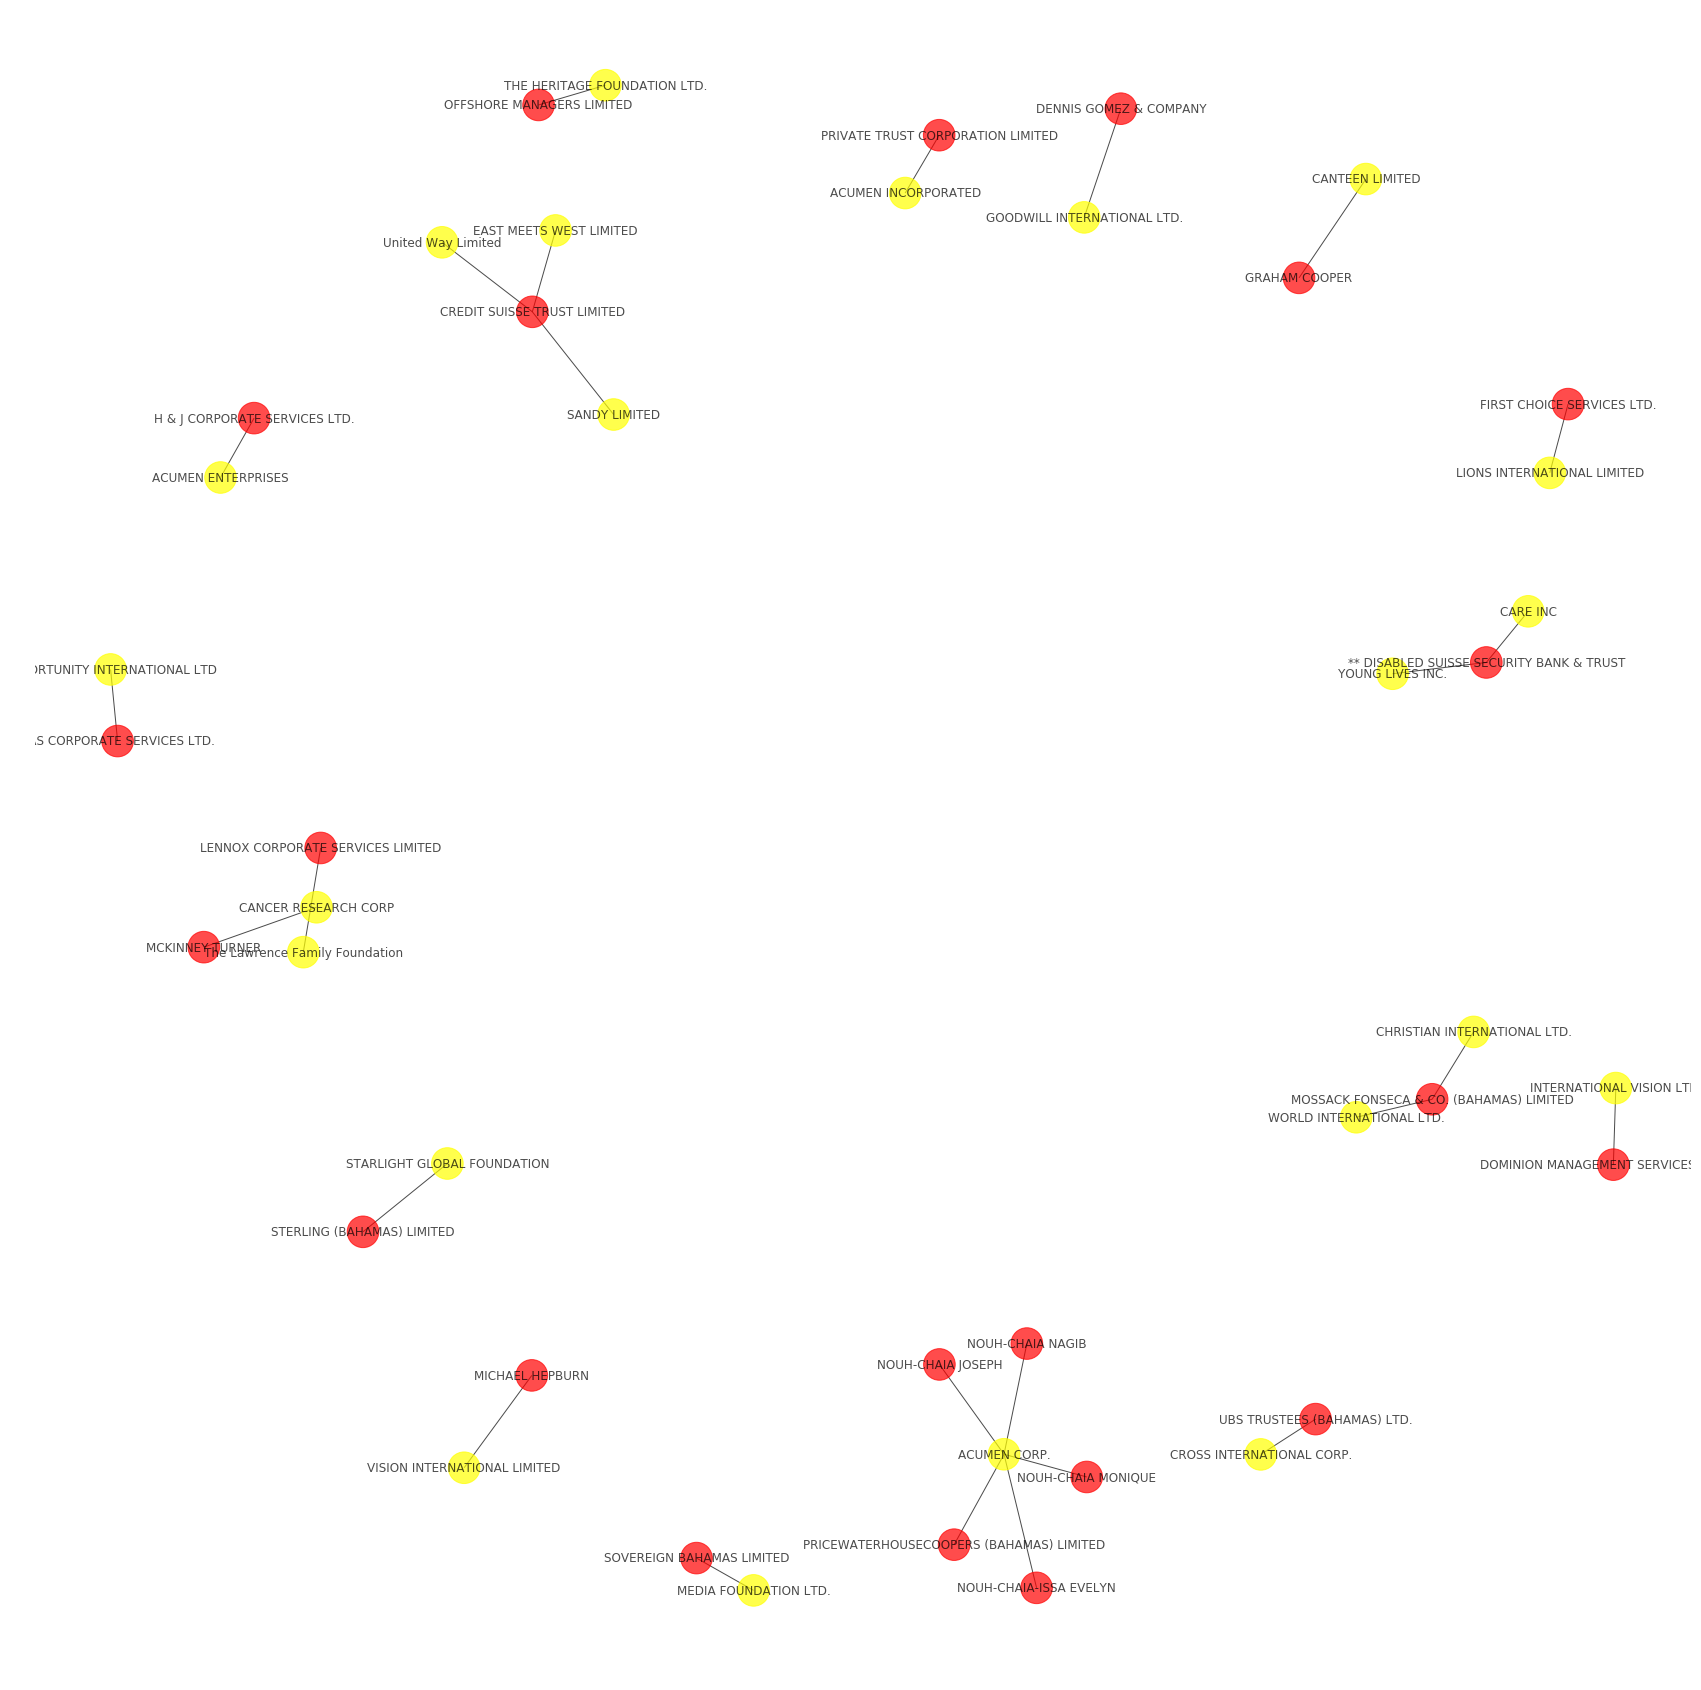

In [18]:
bahamas_graph, bahamas_colors = graph_leak_matches('bahamas')

Size before removing loners: 73
Size after removing loners: 20
Matches for panama papers: 
Name: 
Type: Graph
Number of nodes: 21
Number of edges: 15
Average degree:   1.4286


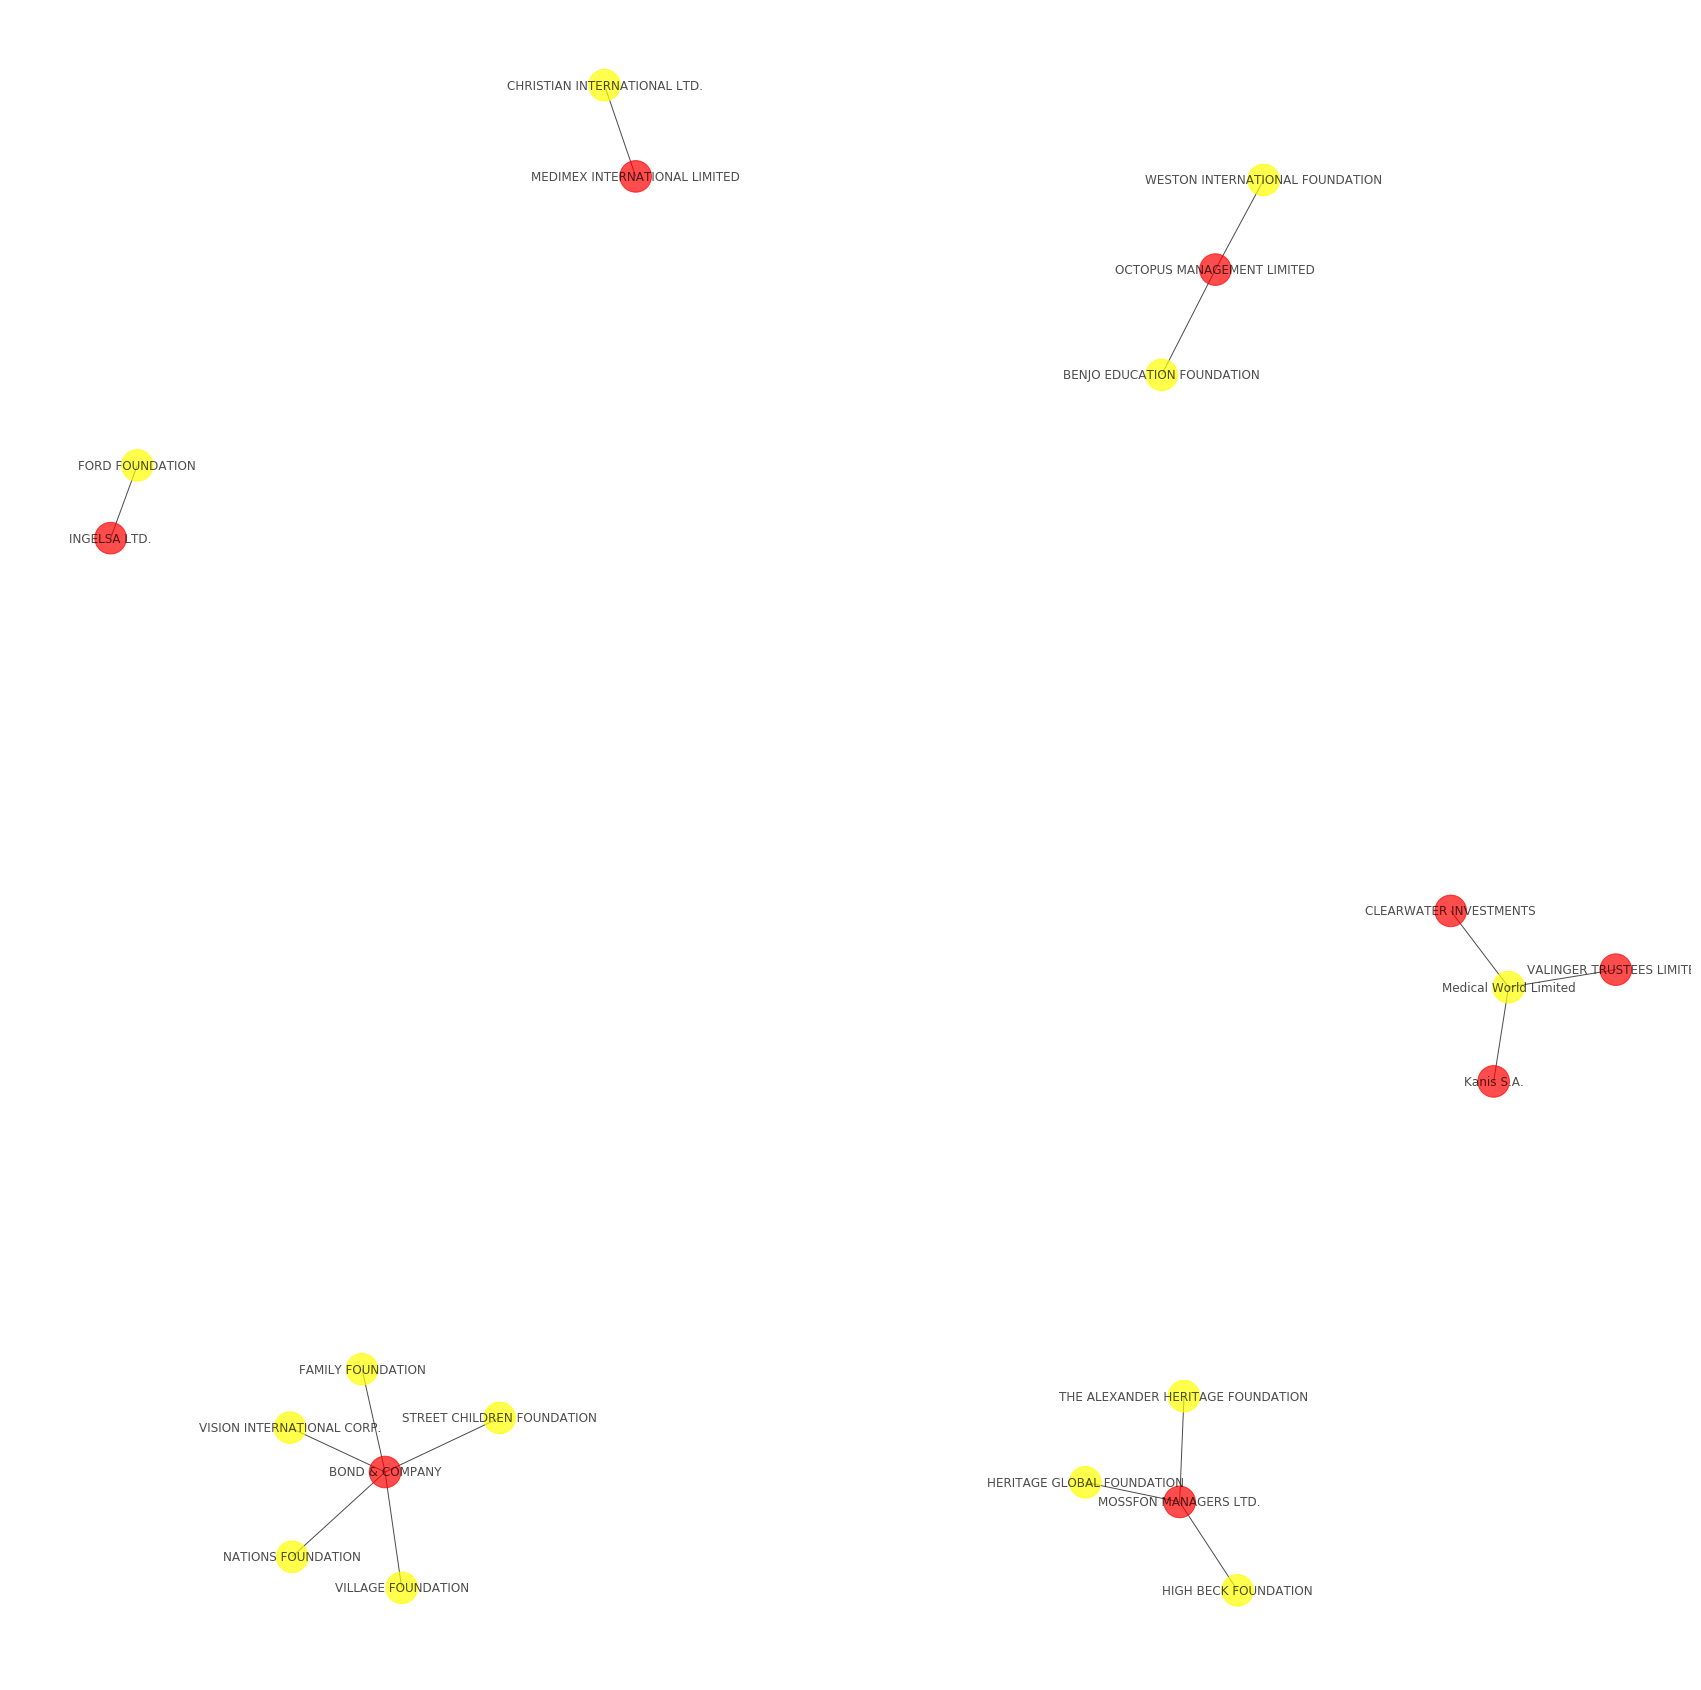

In [28]:
graph_leak_matches('panama', True)

Size before removing loners: 414
Size after removing loners: 122
Matches for paradise papers: 
Name: 
Type: Graph
Number of nodes: 91
Number of edges: 80
Average degree:   1.7582


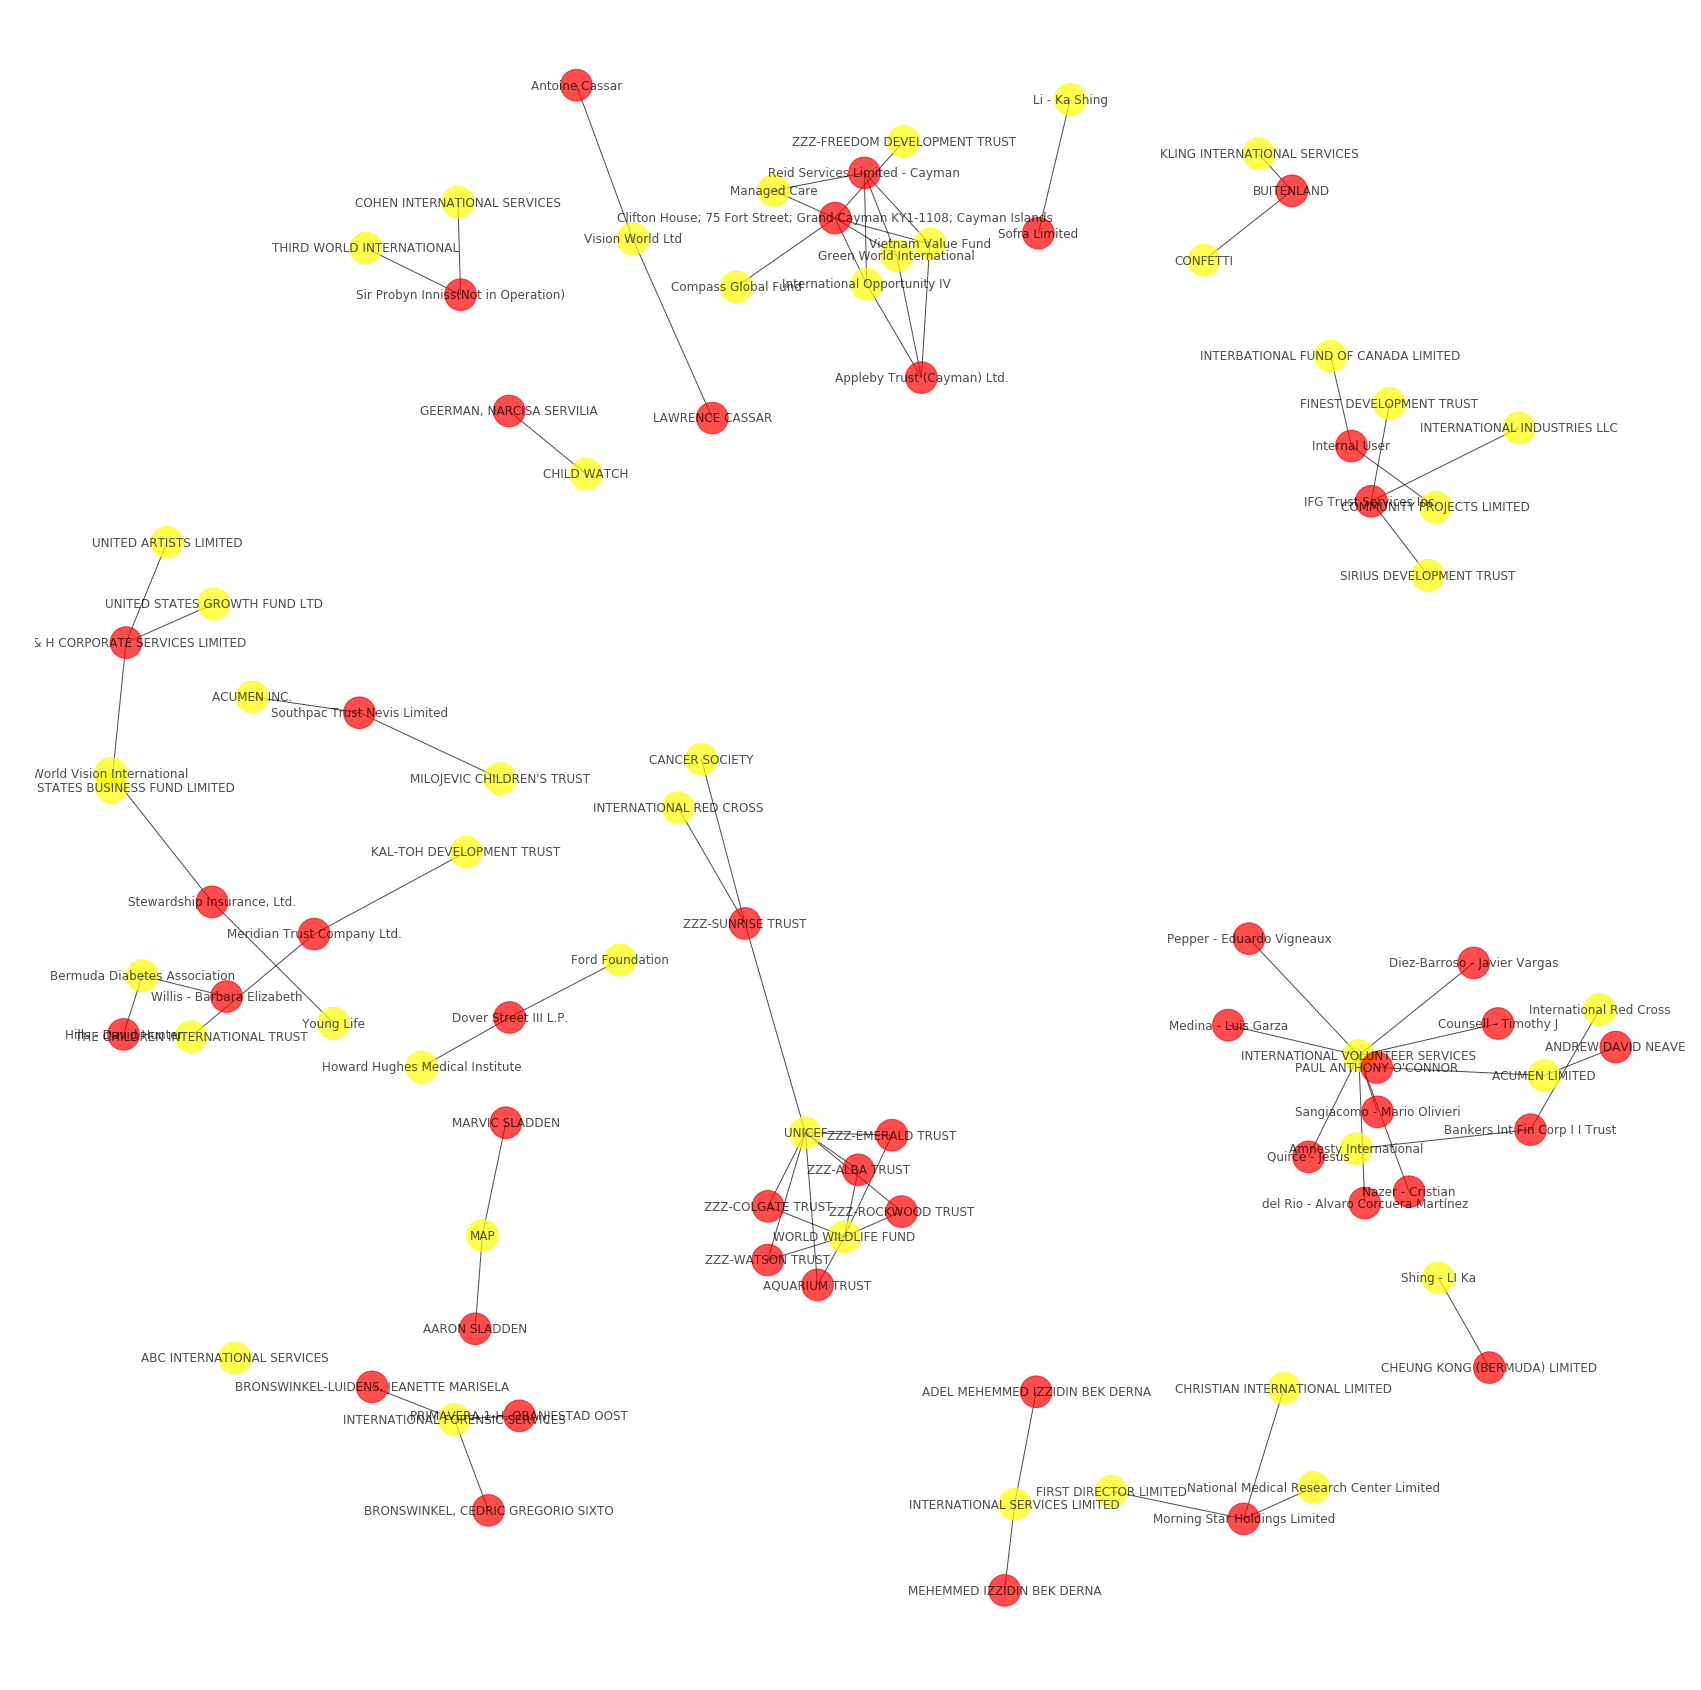

In [29]:
graph_leak_matches('paradise', True)

Size before removing loners: 68
Size after removing loners: 23
Matches for offshore papers: 
Name: 
Type: Graph
Number of nodes: 15
Number of edges: 11
Average degree:   1.4667


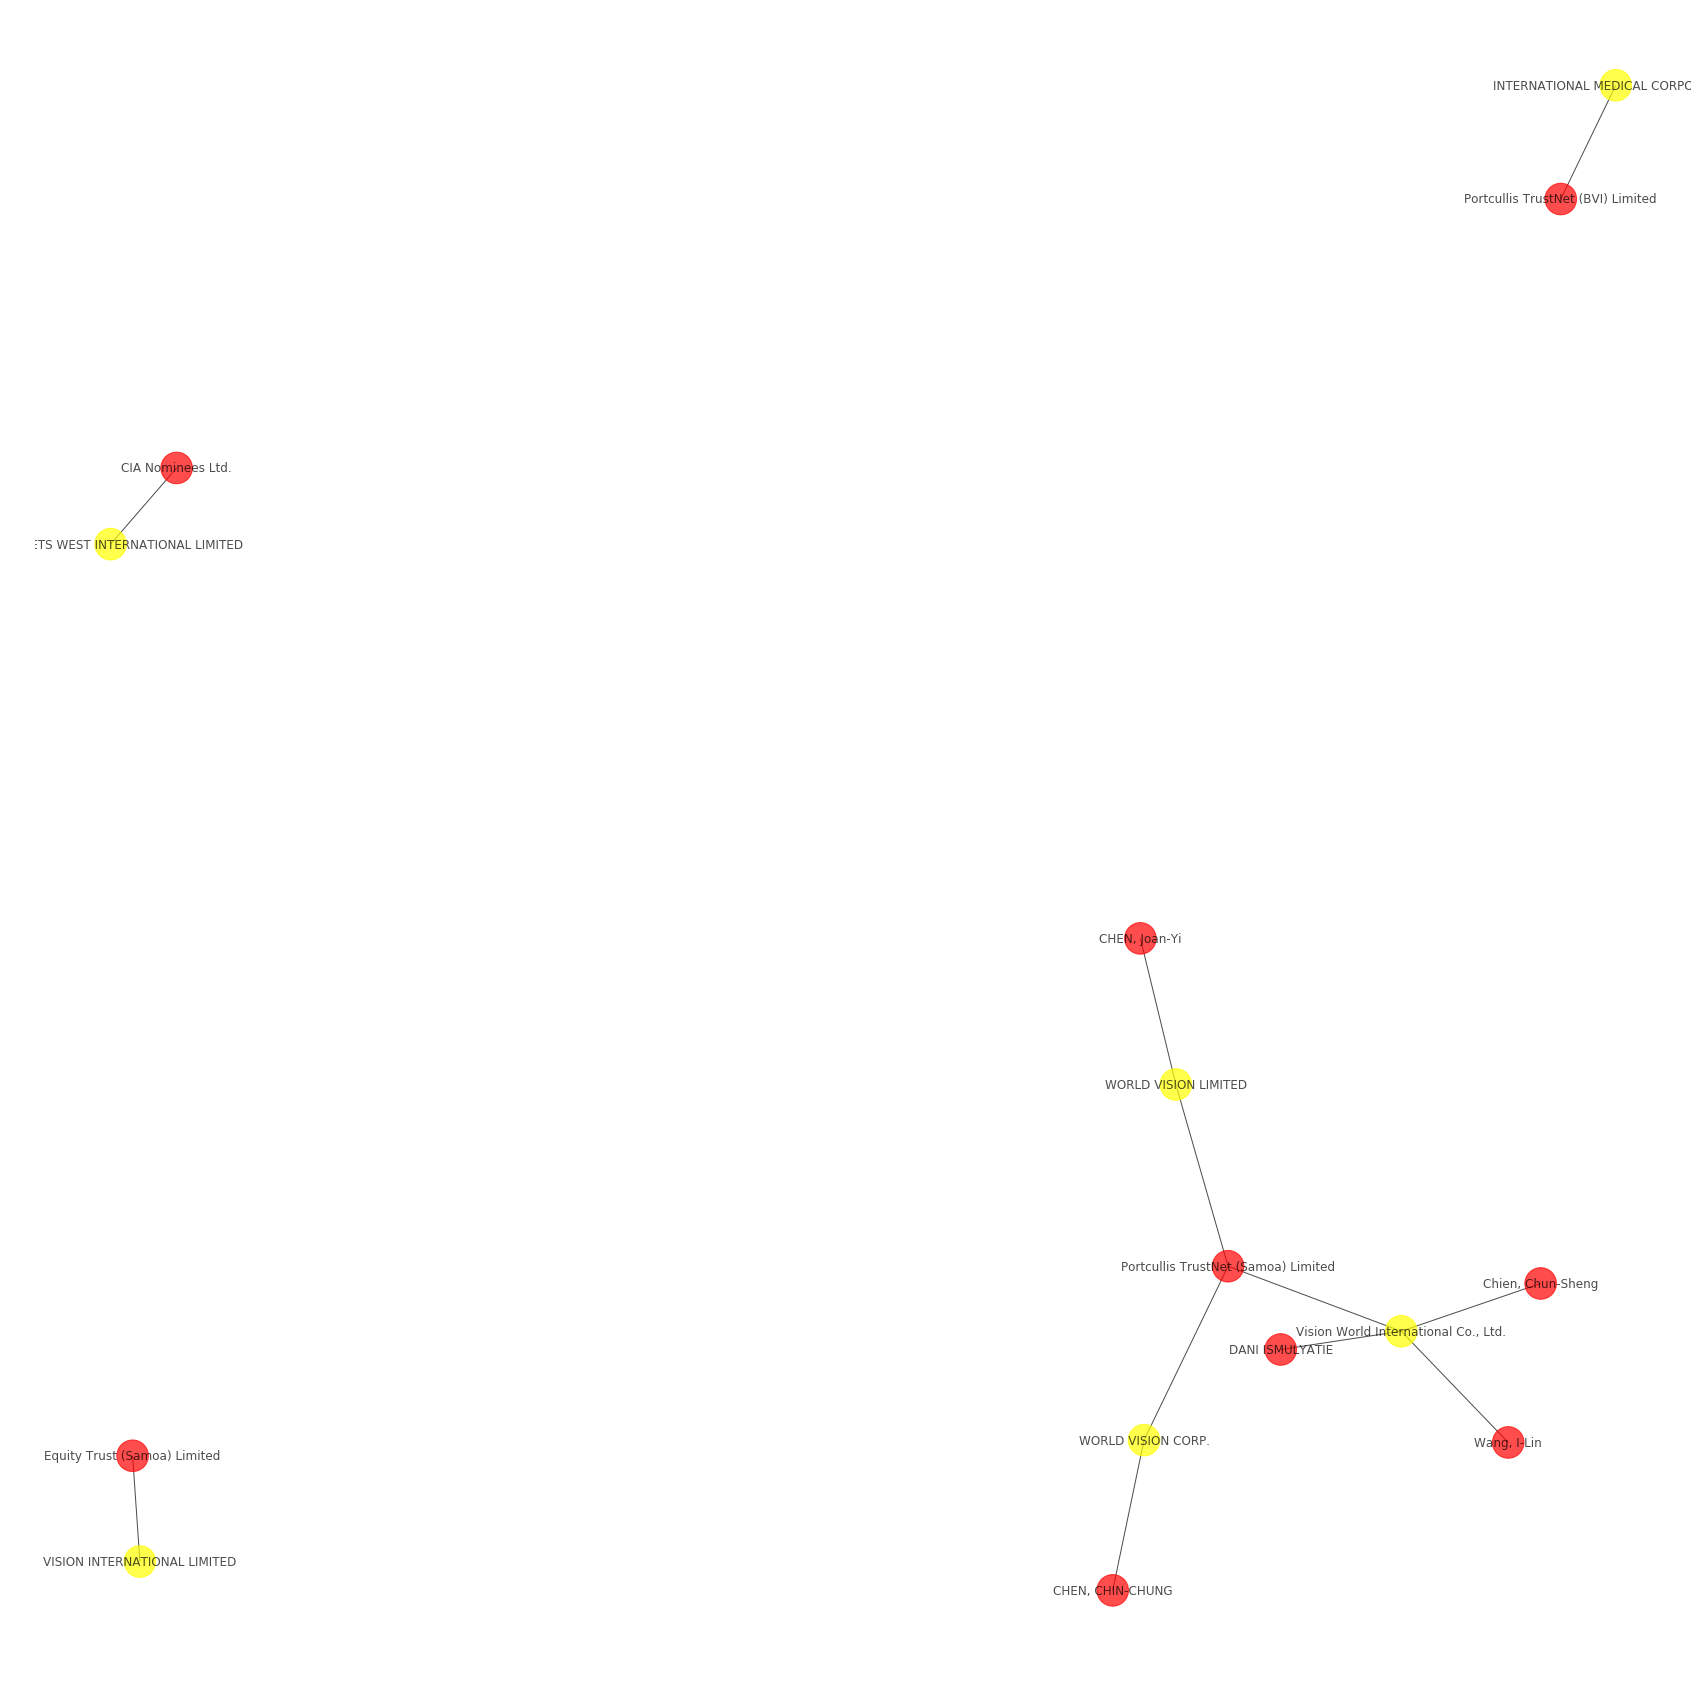

In [30]:
graph_leak_matches('offshore', True)

Size before removing loners: 27
Size after removing loners: 7
Matches for bahamas papers: 
Name: 
Type: Graph
Number of nodes: 10
Number of edges: 7
Average degree:   1.4000


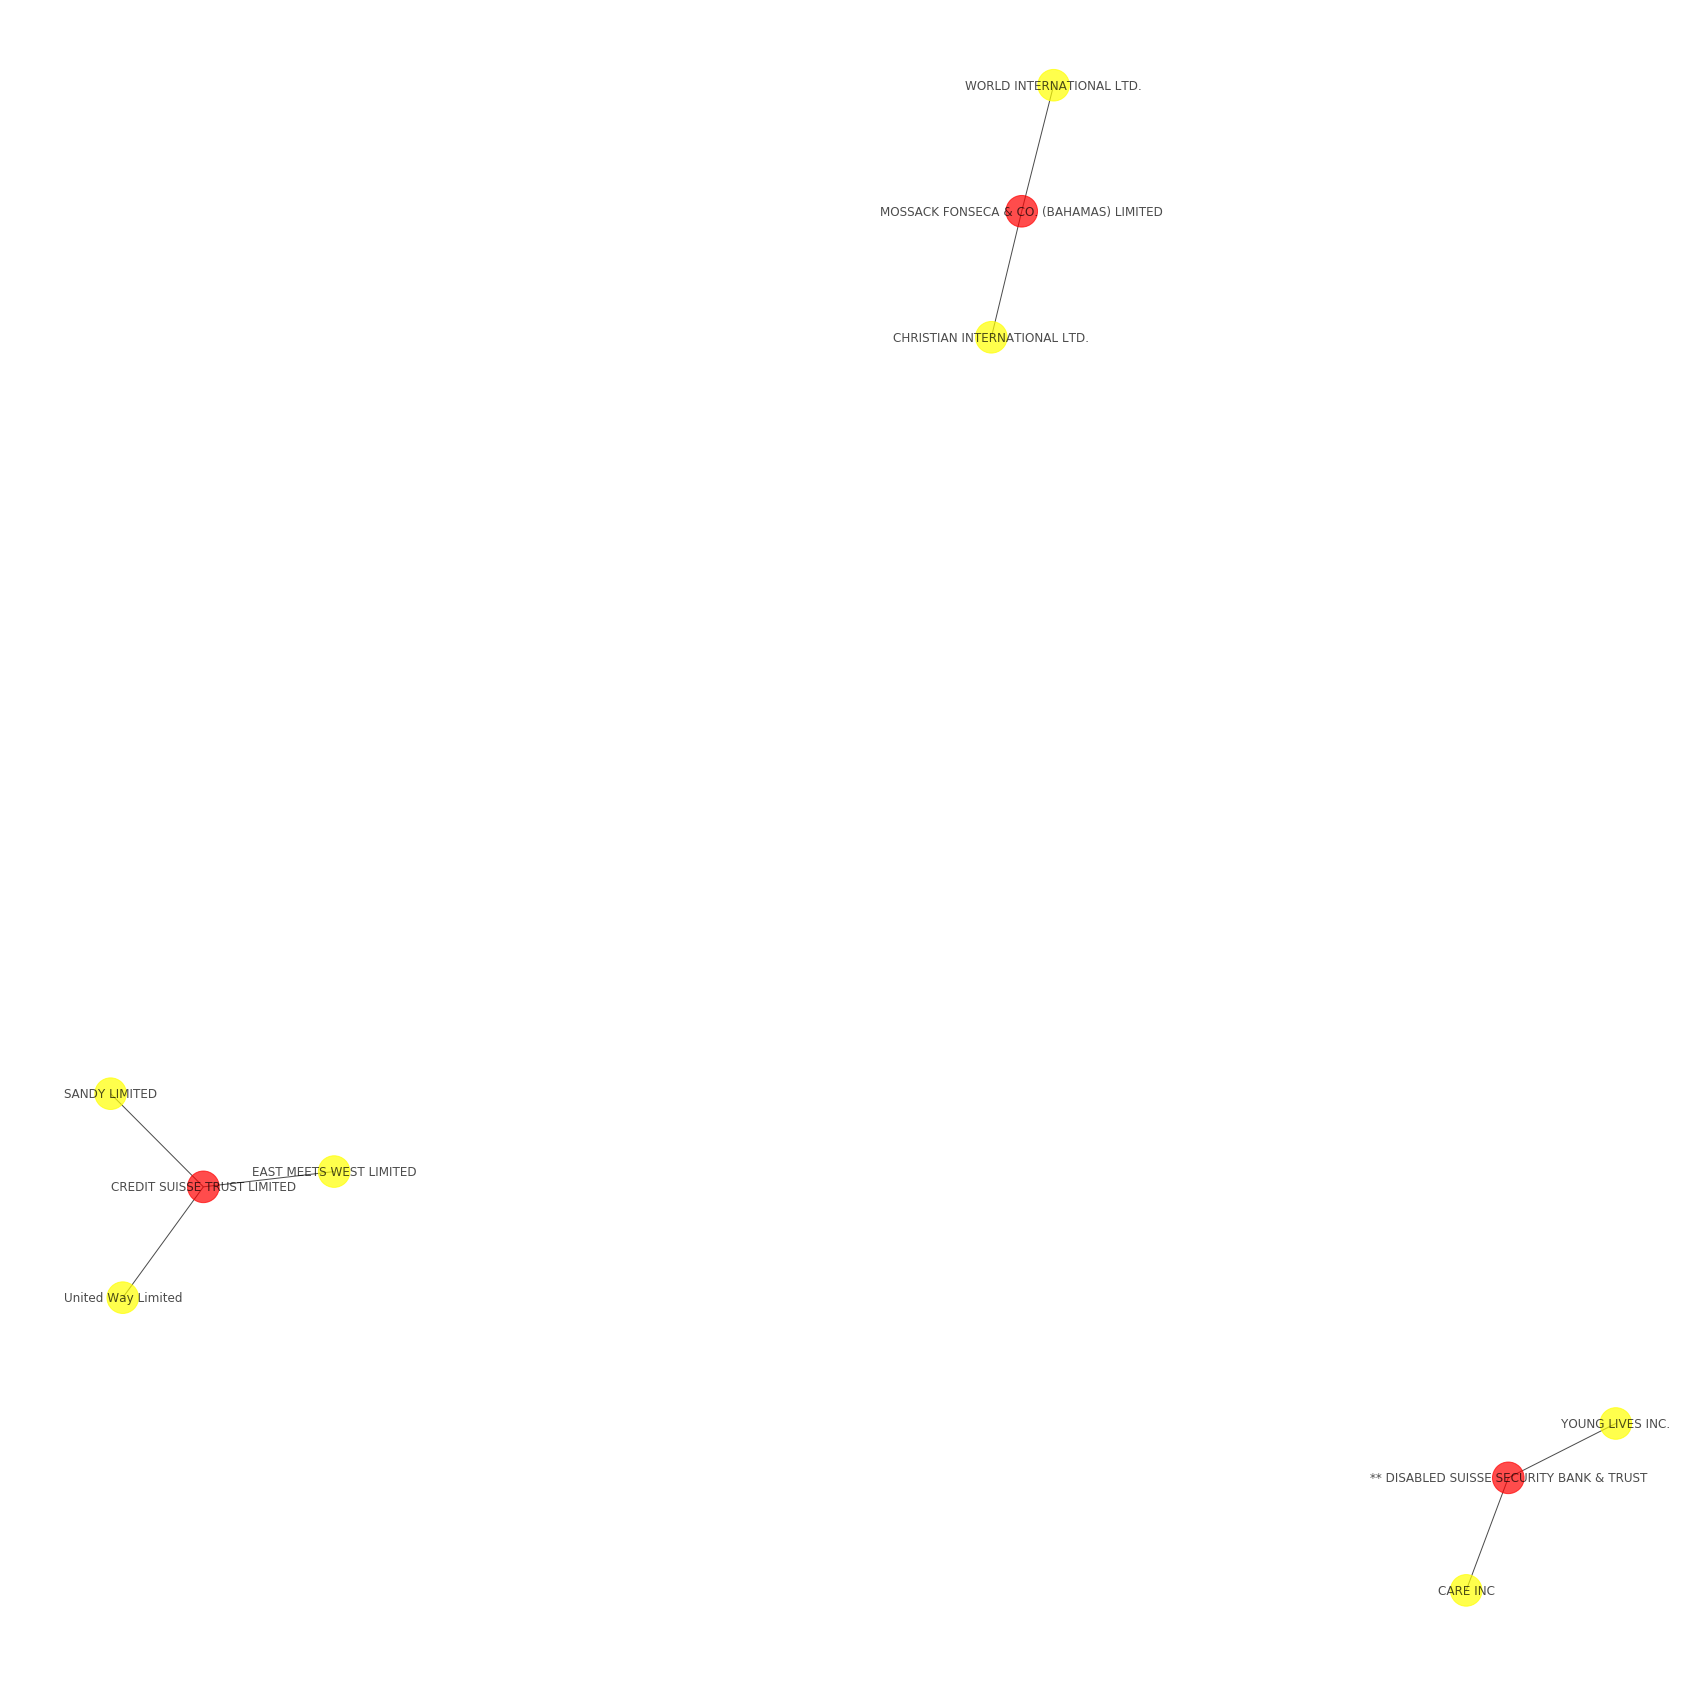

In [31]:
graph_leak_matches('bahamas', True)